In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load files
beg = pd.read_csv(r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\BegInvFINAL12312016 (1).csv')
end = pd.read_csv(r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\EndInvFINAL12312016 (1).csv')
sales = pd.read_csv(r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\SalesFINAL12312016 (1).csv')
invoice = pd.read_csv(r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\InvoicePurchases12312016 (1).csv')
purchase = pd.read_csv(r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\PurchasesFINAL12312016 (1).csv')
price = pd.read_csv(r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\2017PurchasePricesDec (1).csv')

In [4]:
beg.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')

In [5]:
end.head()
print(end.shape)
end.info()
end.describe()
end.isnull().sum()
end.isna().sum()

(224489, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [7]:
# fill null values
end['City'].fillna(0, inplace=True)

In [8]:
end.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [9]:
end.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

In [10]:
price.head()
print(price.shape)
price.info()
price.describe()
price.isnull().sum()
price.isna().sum()

(12261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [11]:
# drop null values
price.dropna(inplace=True)

In [12]:
price.isnull().sum()

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [13]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [14]:
invoice.columns
invoice.head()
print(invoice.shape)
invoice.info()
invoice.describe()
invoice.isnull().sum()
invoice.isna().sum()

(5543, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [15]:
# drop column
invoice.drop(columns=['Approval'], inplace=True)

In [16]:
invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight'],
      dtype='object')

In [17]:
# drop null values
purchase.dropna(inplace=True)

In [18]:
purchase.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [19]:
# Clean column names (strip, lowercase, replace spaces)
def clean_cols(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

dfs = [beg, end, price, sales, invoice, purchase]
beg, end, price, sales, invoice, purchase = [clean_cols(df) for df in dfs]

In [23]:
beg['startdate'] = pd.to_datetime(beg['startdate'])
end['enddate'] = pd.to_datetime(end['enddate'])
invoice['invoicedate'] = pd.to_datetime(invoice['invoicedate'])
invoice['paydate'] = pd.to_datetime(invoice['paydate'])
purchase['podate'] = pd.to_datetime(purchase['podate'])


In [26]:
print(sales[sales['salesquantity'] < 0])
print(beg[beg['onhand'] < 0])
print(end[end['onhand'] < 0])
print(price[price['price'] < 0])

Empty DataFrame
Columns: [inventoryid, store, brand, description, size, salesquantity, salesdollars, salesprice, salesdate, volume, classification, excisetax, vendorno, vendorname]
Index: []
Empty DataFrame
Columns: [inventoryid, store, city, brand, description, size, onhand, price, startdate]
Index: []
Empty DataFrame
Columns: [inventoryid, store, city, brand, description, size, onhand, price, enddate]
Index: []
Empty DataFrame
Columns: [brand, description, price, size, volume, classification, purchaseprice, vendornumber, vendorname]
Index: []


In [27]:
print(beg['startdate'].notnull().mean())  # % records matched with begin inventory
print(end['enddate'].notnull().mean())    # % matched with end inventory
print(purchase['purchaseprice'].notnull().mean())  # % with purchase price
print(purchase['receivingdate'].notnull().mean())  # % with valid PO received

1.0
1.0
1.0
1.0


In [31]:
# numeric_cols = ['salesquantity', 'salesdollars', 'onhand', 'price', 'purchaseprice', 'freight', 'dollars']

sales[['salesquantity', 'salesdollars']].apply(pd.to_numeric, errors='coerce')
beg['onhand'] = pd.to_numeric(beg['onhand'], errors='coerce')
end['onhand'] = pd.to_numeric(end['onhand'], errors='coerce')
price['price'] = pd.to_numeric(price['price'], errors='coerce')
purchase['purchaseprice'] = pd.to_numeric(purchase['purchaseprice'], errors='coerce')
invoice['freight'] = pd.to_numeric(invoice['freight'], errors='coerce')
purchase['dollars'] = pd.to_numeric(purchase['dollars'], errors='coerce')


In [33]:
# Unified purchase price (prefer transaction price, fallback to catalog)
purchase['final_purchase_price'] = price['purchaseprice'].combine_first(purchase['purchaseprice'])

# Inventory value at sale point
beg['begin_inventory_value'] = beg['onhand'] * beg['price']

# Sales value check
sales['sales_check'] = sales['salesquantity'] * sales['salesprice']

In [ ]:
# phase 2

In [50]:
 # Inventory Turnover & DIO
# Average inventory from begin and end
avg_inventory = (beg['onhand'] + end['onhand']) / 2

# Inventory turnover ratio
sales['inventory_turnover'] = sales['salesquantity'] / avg_inventory

# Handle div-by-zero or NaN
sales['inventory_turnover'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# DIO calculation
sales['DIO'] = 365 / sales['inventory_turnover']

In [51]:
sales['DIO'] = sales['DIO'].clip(upper=365*3)  # Cap at 3 years

In [46]:
# ABC Classification

sales['annual_sales_value'] = sales['salesquantity'] * sales['salesprice']

abc_df = sales.groupby(['inventoryid', 'brand', 'description'], as_index=False)['annual_sales_value'].sum()


abc_df = abc_df.sort_values(by='annual_sales_value', ascending=False)
abc_df['cum_percent'] = abc_df['annual_sales_value'].cumsum() / abc_df['annual_sales_value'].sum()

def classify_abc(p):
    if p <= 0.8:
        return 'A'
    elif p <= 0.95:
        return 'B'
    else:
        return 'C'

abc_df['ABC'] = abc_df['cum_percent'].apply(classify_abc)

sales = sales.merge(abc_df[['inventoryid', 'ABC']], on='inventoryid', how='left')
 
 

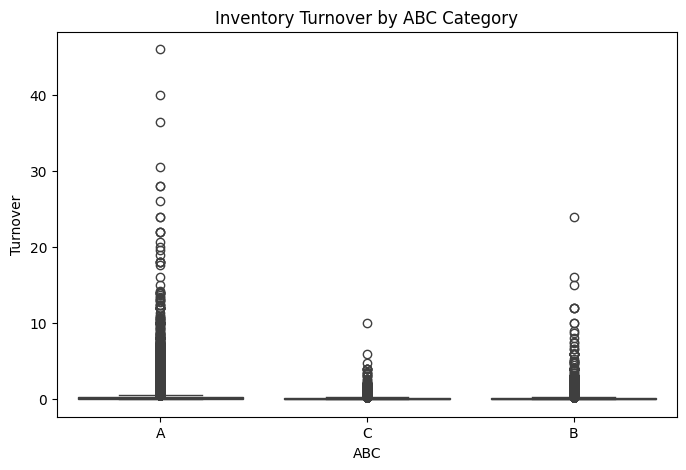

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot( data = sales, x='ABC', y='inventory_turnover')
plt.title('Inventory Turnover by ABC Category')
plt.ylabel('Turnover')
plt.show()

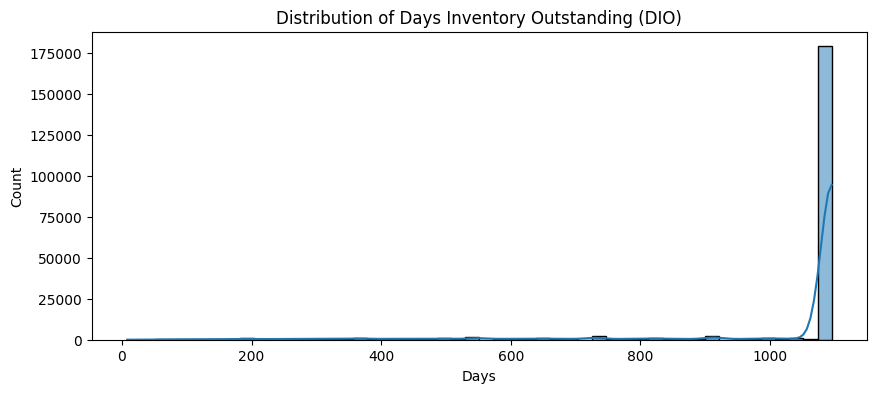

In [52]:
plt.figure(figsize=(10, 4))
sns.histplot(sales['DIO'].dropna(), bins=50, kde=True)
plt.title('Distribution of Days Inventory Outstanding (DIO)')
plt.xlabel('Days')
plt.show()

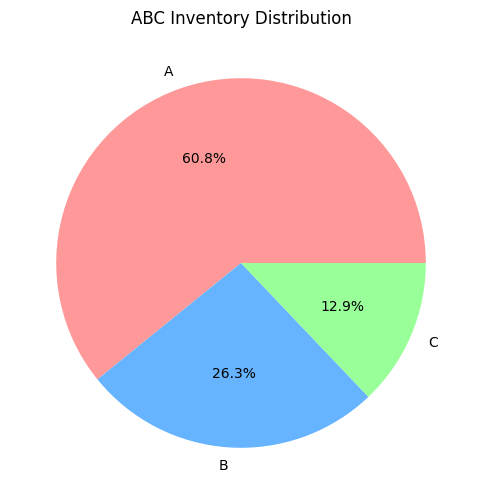

In [49]:
abc_counts = sales['ABC'].value_counts()

plt.figure(figsize=(6, 6))
abc_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('ABC Inventory Distribution')
plt.ylabel('')
plt.show()

In [53]:
# Basic stats per category
summary = sales.groupby('ABC').agg({
    'salesquantity': 'sum',
    'annual_sales_value': 'sum',
    'inventory_turnover': 'mean',
    'DIO': 'mean'
}).reset_index()

print(summary)

  ABC  salesquantity  annual_sales_value inventory_turnover          DIO
0   A        1777580         26511400.30           0.247058  1014.581371
1   B         478498          4970981.24           0.158161  1058.002954
2   C         195091          1656993.75           0.127388  1072.007744


In [ ]:
# Phase 3

In [56]:
# Calculate monthly sales per item from sales data (assuming 12 months of data)
avg_sales_df = sales.groupby('inventoryid', as_index=False)['salesquantity'].sum()
avg_sales_df['avg_monthly_sales'] = avg_sales_df['salesquantity'] / 12

# Merge into beg
beg = beg.merge(avg_sales_df[['inventoryid', 'avg_monthly_sales']], on='inventoryid', how='left')


In [57]:
# Inventory Health Flags

def health_flag(row):
    if pd.isna(row['avg_monthly_sales']) or row['avg_monthly_sales'] == 0:
        return 'Unknown'
    if row['onhand'] > 1.2 * row['avg_monthly_sales']:
        return 'Overstock'
    elif row['onhand'] < 0.8 * row['avg_monthly_sales']:
        return 'Understock'
    else:
        return 'Healthy'

beg['inventory_health'] = beg.apply(health_flag, axis=1)

In [58]:
# Inventory Aging (Days on Hand)

from datetime import datetime

today = pd.Timestamp(datetime.today().date())
beg['inventory_age_days'] = (today - beg['startdate']).dt.days

In [59]:
# Dead Stock Detection

beg['dead_stock_flag'] = ((sales['salesquantity'] == 0) & 
                             (beg['inventory_age_days'] > 180) &
                             (beg['onhand'] > 0)).astype(int)

In [60]:
# C-Item Overstock Watchlist

# Subset C-items that are overstocked
c_item_overstock = (sales['ABC'] == 'C') & (beg['inventory_health'] == 'Overstock')



C:\Users\USER\AppData\Local\Temp\ipykernel_1880\2549169327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=beg, x='inventory_health', palette='Set2')


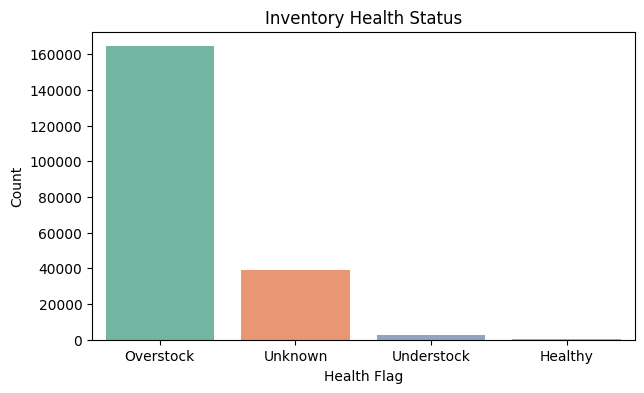

In [61]:
plt.figure(figsize=(7, 4))
sns.countplot(data=beg, x='inventory_health', palette='Set2')
plt.title('Inventory Health Status')
plt.xlabel('Health Flag')
plt.ylabel('Count')
plt.show()

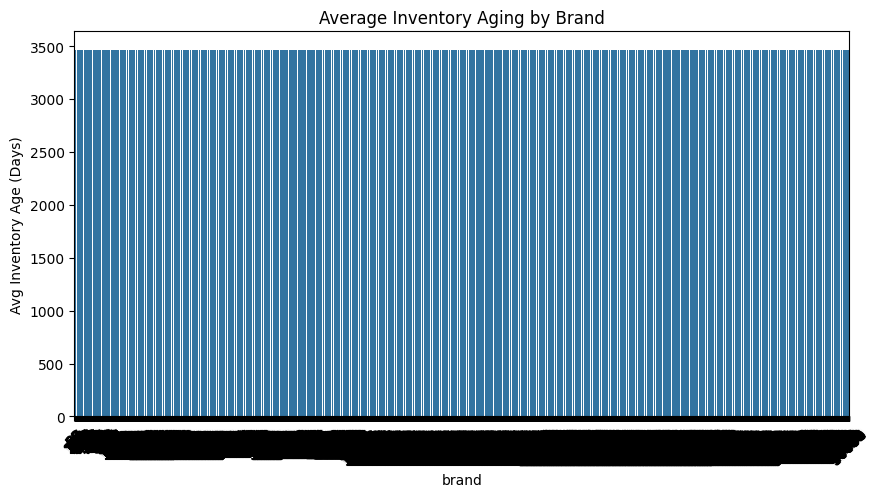

In [62]:
aging_by_brand = beg.groupby('brand')['inventory_age_days'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=aging_by_brand.index, y=aging_by_brand.values)
plt.xticks(rotation=45)
plt.ylabel('Avg Inventory Age (Days)')
plt.title('Average Inventory Aging by Brand')
plt.show()

In [66]:
# C-item Overstock Table Preview

c_item_overstock = beg[['inventoryid', 'brand', 'description', 'onhand', 'inventory_age_days']]

In [67]:
print(c_item_overstock.head(10))

          inventoryid  brand                  description  onhand  \
0   1_HARDERSFIELD_58     58  Gekkeikan Black & Gold Sake       8   
1   1_HARDERSFIELD_60     60       Canadian Club 1858 VAP       7   
2   1_HARDERSFIELD_62     62     Herradura Silver Tequila       6   
3   1_HARDERSFIELD_63     63   Herradura Reposado Tequila       3   
4   1_HARDERSFIELD_72     72         No. 3 London Dry Gin       6   
5   1_HARDERSFIELD_75     75    Three Olives Tomato Vodka      18   
6   1_HARDERSFIELD_77     77  Three Olives Espresso Vodka       7   
7   1_HARDERSFIELD_79     79     Three Olives Loopy Vodka       2   
8  1_HARDERSFIELD_115    115              Belvedere Vodka       5   
9  1_HARDERSFIELD_120    120  Tarantula Azul Tequila Gift      11   

   inventory_age_days  
0                3466  
1                3466  
2                3466  
3                3466  
4                3466  
5                3466  
6                3466  
7                3466  
8                3466  


In [68]:
# Summary Metrics

summary_health = beg['inventory_health'].value_counts(normalize=True) * 100
print("Inventory Health Distribution (%):")
print(summary_health)

dead_stock_count = beg['dead_stock_flag'].sum()
print(f"\nTotal Dead Stock Items: {dead_stock_count}")

Inventory Health Distribution (%):
inventory_health
Overstock     79.641600
Unknown       19.014279
Understock     1.172232
Healthy        0.171889
Name: proportion, dtype: float64

Total Dead Stock Items: 0


In [ ]:
# Phase 4

In [70]:
# Forecast Demand (Simple Moving Average)

# Forecast demand (monthly) using avg monthly sales
demand_forecast = sales.groupby('inventoryid')['avg_monthly_sales'].mean().reset_index()
demand_forecast.rename(columns={'avg_monthly_sales': 'forecast_monthly_demand'}, inplace=True)

# Merge back to master
sales = sales.merge(demand_forecast, on='inventoryid', how='left')

In [72]:
purchase.columns

Index(['inventoryid', 'store', 'brand', 'description', 'size', 'vendornumber',
       'vendorname', 'ponumber', 'podate', 'receivingdate', 'invoicedate',
       'paydate', 'purchaseprice', 'quantity', 'dollars', 'classification',
       'final_purchase_price'],
      dtype='object')

In [75]:
# EOQ Calculation

import numpy as np

ordering_cost = 100  # Assumed fixed per order
holding_rate = 0.20  # 20% annual carrying cost

# Annual demand forecast
sales['forecast_annual_demand'] = sales['forecast_monthly_demand'] * 12

# Holding cost per unit
purchase['holding_cost'] = holding_rate * purchase['final_purchase_price']

# EOQ formula
sales['EOQ'] = np.sqrt((2 * sales['forecast_annual_demand'] * ordering_cost) / purchase['holding_cost'])

In [76]:
# Reorder Point (ROP) with Safety Stock

lead_time_days = 10

# Daily forecast demand
sales['daily_demand'] = sales['forecast_annual_demand'] / 365

# Basic safety stock
sales['safety_stock'] = 0.25 * sales['daily_demand'] * lead_time_days

# Reorder point
sales['ROP'] = (sales['daily_demand'] * lead_time_days) + sales['safety_stock']

In [77]:
# Preview Table

preview_table = sales[['inventoryid', 'brand', 'forecast_annual_demand', 'EOQ', 'ROP', 'safety_stock']]

In [78]:
print(preview_table.head(10))

            inventoryid  brand  forecast_annual_demand        EOQ       ROP  \
0   1_HARDERSFIELD_1004   1004                1.307692  11.870767  0.044784   
1   1_HARDERSFIELD_1004   1004                1.307692   6.753656  0.044784   
2   1_HARDERSFIELD_1004   1004                1.307692   6.552210  0.044784   
3   1_HARDERSFIELD_1004   1004                1.307692   7.077002  0.044784   
4   1_HARDERSFIELD_1005   1005                1.100000  10.027385  0.037671   
5   1_HARDERSFIELD_1005   1005                1.100000  10.289365  0.037671   
6   1_HARDERSFIELD_1005   1005                1.100000  10.693227  0.037671   
7   1_HARDERSFIELD_1005   1005                1.100000   7.174540  0.037671   
8  1_HARDERSFIELD_10058  10058                3.357143  12.910860  0.114971   
9  1_HARDERSFIELD_10058  10058                3.357143  19.367492  0.114971   

   safety_stock  
0      0.008957  
1      0.008957  
2      0.008957  
3      0.008957  
4      0.007534  
5      0.007534  
6   

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


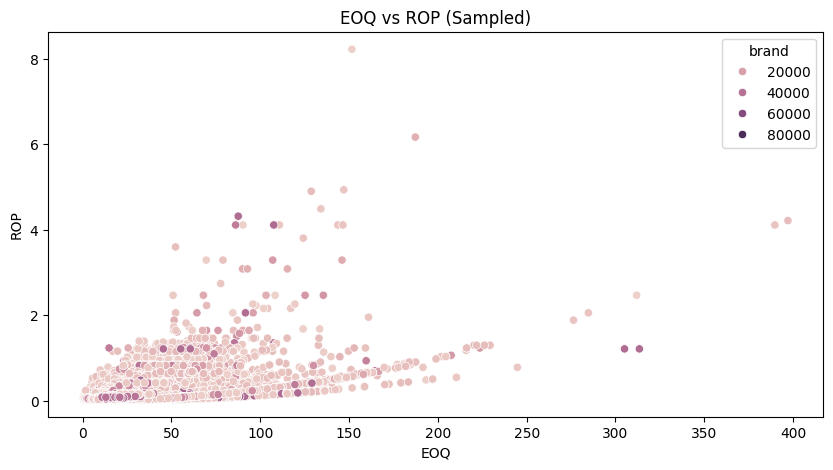

In [79]:
# EOQ & ROP Visual Check

plt.figure(figsize=(10, 5))
sample = sales[['brand', 'EOQ', 'ROP']].dropna().sample(50)

sns.scatterplot(data=sales, x='EOQ', y='ROP', hue='brand')
plt.title('EOQ vs ROP (Sampled)')
plt.xlabel('EOQ')
plt.ylabel('ROP')
plt.show()

In [81]:
from prophet import Prophet

# Make sure salesdate is in datetime format
sales['salesdate'] = pd.to_datetime(sales['salesdate'])

# Pick a sample inventoryid (SKU)
sample_id = sales['inventoryid'].dropna().unique()[0]

# Filter data for this SKU
sku_sales = sales[sales['inventoryid'] == sample_id]

# Group daily sales
daily_sales = sku_sales.groupby('salesdate')['salesquantity'].sum().reset_index()

# Set salesdate as index for resampling
daily_sales.set_index('salesdate', inplace=True)

# Resample to monthly sales
monthly_sales = daily_sales.resample('M').sum().reset_index()

# Rename for Prophet
monthly_sales.columns = ['ds', 'y']


In [82]:
model = Prophet()
model.fit(monthly_sales)

17:36:13 - cmdstanpy - INFO - Chain [1] start processing
17:36:22 - cmdstanpy - INFO - Chain [1] done processing


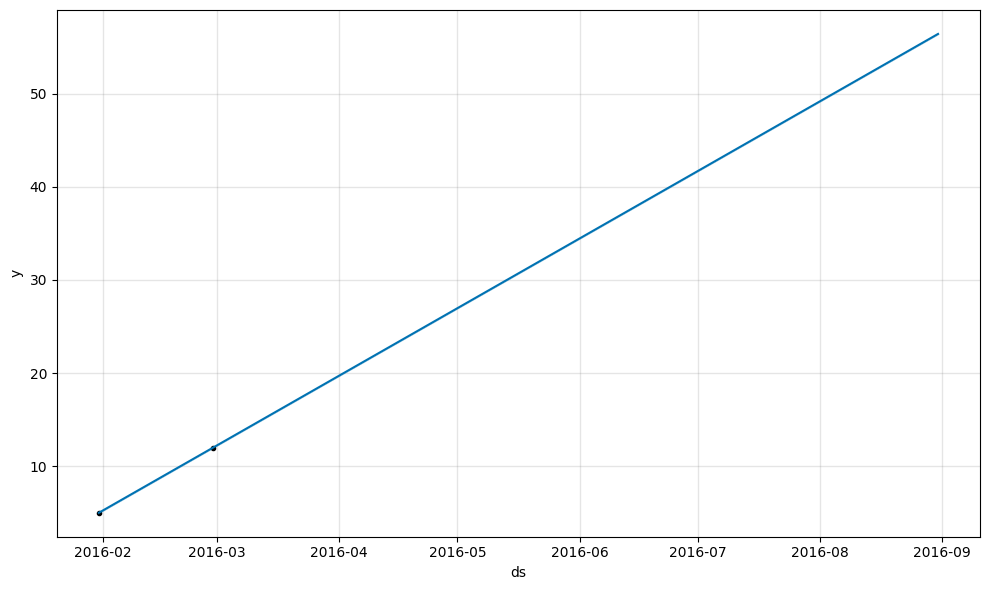

In [83]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast);

In [84]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
2,2016-03-31,19.482758,19.482758,19.482758
3,2016-04-30,26.724135,26.724134,26.724135
4,2016-05-31,34.206891,34.206890,34.206891
5,2016-06-30,41.448267,41.448267,41.448268
6,2016-07-31,48.931024,48.931022,48.931025
7,2016-08-31,56.413780,56.413778,56.413781


In [ ]:
# phase 5

In [86]:
purchase['receivingdate'] = pd.to_datetime(purchase['receivingdate'])
purchase['podate'] = pd.to_datetime(purchase['podate'])


In [87]:
# Lead Time Calculation

# Calculate lead time for each PO
purchase['lead_time_days'] = (purchase['receivingdate'] - purchase['podate']).dt.days

# Average lead time per vendor
vendor_lead = purchase.groupby('vendornumber')['lead_time_days'].mean().reset_index()
vendor_lead.rename(columns={'lead_time_days': 'avg_lead_time'}, inplace=True)

# Merge back to purchase
purchase = purchase.merge(vendor_lead, on='vendornumber', how='left')

In [88]:
# Vendor On-Time Delivery %

purchase['on_time'] = purchase['lead_time_days'] <= 10
vendor_ontime = purchase.groupby('vendornumber')['on_time'].mean().reset_index()
vendor_ontime.rename(columns={'on_time': 'on_time_delivery_pct'}, inplace=True)

# Merge
purchase = purchase.merge(vendor_ontime, on='vendornumber', how='left')


In [91]:
# Merge EOQ and ROP from sales or avg_sales_df into beg
beg = beg.merge(sales[['inventoryid', 'EOQ', 'ROP']], on='inventoryid', how='left')


In [93]:
beg.columns

Index(['inventoryid', 'store', 'city', 'brand', 'description', 'size',
       'onhand', 'price', 'startdate', 'begin_inventory_value',
       'avg_monthly_sales', 'inventory_health', 'inventory_age_days',
       'dead_stock_flag', 'EOQ_x', 'EOQ_y', 'ROP', 'trigger_reorder'],
      dtype='object')

In [94]:
beg['EOQ'] = beg['EOQ_x']

In [95]:
# Procurement Trigger Logic

beg['trigger_reorder'] = beg['onhand'] <= beg['ROP']
beg['reorder_qty'] = beg['EOQ'].where(beg['trigger_reorder'], 0)


In [96]:
# Optional Vendor Scorecard

vendor_scorecard = purchase.groupby('vendorname').agg({
    'on_time_delivery_pct': 'mean',
    'avg_lead_time': 'mean',
    'final_purchase_price': 'mean'
}).sort_values(by='on_time_delivery_pct', ascending=False)

print(vendor_scorecard.head(10))

                             on_time_delivery_pct  avg_lead_time  \
vendorname                                                         
AAPER ALCOHOL & CHEMICAL CO              1.000000      10.000000   
TRUETT HURST                             1.000000       5.000000   
GILMANTON WINERY & VINEYARD              1.000000       8.000000   
SILVER MOUNTAIN CIDERS                   1.000000       8.500000   
FANTASY FINE WINES CORP                  1.000000       7.500000   
LAUREATE IMPORTS CO                      1.000000      10.000000   
CAPSTONE INTERNATIONAL                   1.000000       8.000000   
HIGHLAND WINE MERCHANTS LLC              1.000000       5.321429   
Circa Wines                              0.961373       6.948498   
SEA HAGG DISTILLERY LLC                  0.952663       7.022823   

                             final_purchase_price  
vendorname                                         
AAPER ALCOHOL & CHEMICAL CO            105.070000  
TRUETT HURST               

In [ ]:
# Phase 6

In [97]:
# C-Item Overstock Flag

c_item_overstock = [(sales['ABC'] == 'C') &
    (beg['inventory_health'] == 'Overstock') &
    (beg['onhand'] > 0)
]

In [99]:
inventory = beg.merge(end[['inventoryid', 'onhand']], on='inventoryid', suffixes=('_beg', '_end'))
inventory['avg_inventory_qty'] = (inventory['onhand_beg'] + inventory['onhand_end']) / 2
inventory['inventory_turnover'] = sales['salesquantity'] / inventory['avg_inventory_qty']
inventory['DIO'] = 365 / inventory['inventory_turnover']


In [100]:
# Sales-to-Inventory Efficiency


sales['sales_efficiency'] = sales['salesquantity'] / inventory['avg_inventory_qty']

In [104]:
beg = beg.merge(abc_df[['inventoryid', 'ABC']], on='inventoryid', how='left')


In [106]:
beg['sales_efficiency'] = beg['avg_monthly_sales'] / (beg['onhand'] + 1)  # Avoid div-by-zero


In [107]:
def sustainability_action(row):
    if row['ABC'] == 'C':
        if row['inventory_health'] == 'Overstock' and row['sales_efficiency'] < 0.2:
            return 'Consider Markdown or Delisting'
        elif row['inventory_age_days'] > 180:
            return 'Slow Mover – Evaluate'
    return 'No Action'

beg['sustainability_flag'] = beg.apply(sustainability_action, axis=1)


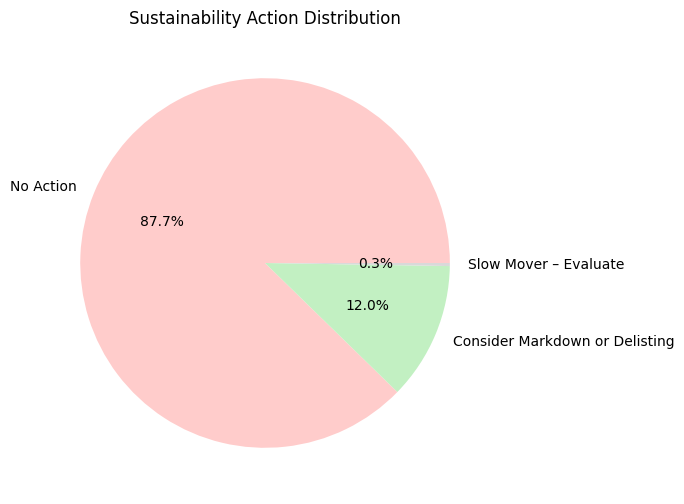

In [108]:
# Visuals for Sustainability

plt.figure(figsize=(6, 6))
beg['sustainability_flag'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ffcccb','#c2f0c2','#d9d9d9'])
plt.title('Sustainability Action Distribution')
plt.ylabel('')
plt.show()

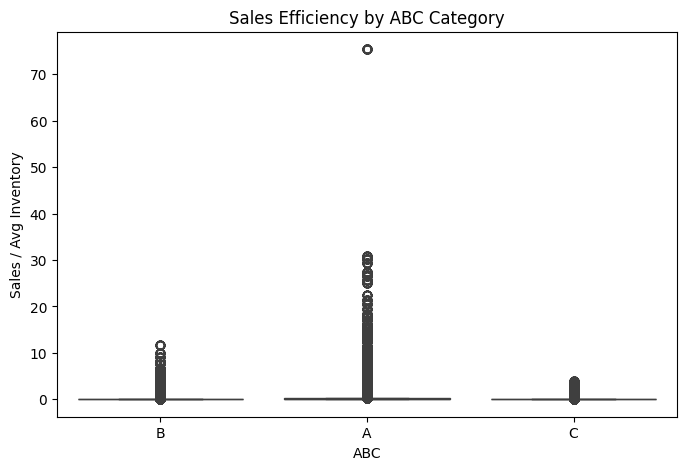

In [109]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=beg, x='ABC', y='sales_efficiency')
plt.title('Sales Efficiency by ABC Category')
plt.ylabel('Sales / Avg Inventory')
plt.show()

In [110]:
import pandas as pd

# Load and split
df = pd.read_csv((r'D:\Unified_Mentor_Projects\Inventory_data_analysis_P3\Data\PurchasesFINAL12312016 (1).csv'), chunksize=100000)

# Save chunks
for i, chunk in enumerate(df):
    chunk.to_csv(f"part_{i}.csv", index=False)
